In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import ElasticNet



## Load the cleaned dataset

In [2]:
train_data = pd.read_csv("./data/train_data.csv")
test_data = pd.read_csv("./data/test_data.csv")

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
housing_dataset = pd.read_csv("./data/output/output.csv")
housing_dataset

,Id,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1.540963,0.000000,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
1,2,1.540963,0.000000,1.540963,1.820334,1.194318,1.820334,0.730463,0.000000,2.259674,...,0,0,0,1,0,0,0,0,1,0
2,3,0.000000,0.000000,1.194318,1.820334,1.194318,1.820334,1.194318,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
3,4,0.000000,0.000000,1.540963,1.820334,1.820334,0.730463,1.540963,0.000000,2.259674,...,0,0,0,1,1,0,0,0,0,0
4,5,0.000000,0.000000,1.194318,1.820334,1.194318,1.820334,0.000000,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.259674,2.259674,...,0,0,0,1,0,0,0,0,1,0
2915,2916,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,2.259674,...,0,0,0,1,1,0,0,0,0,0
2916,2917,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,2.259674,...,0,0,0,1,1,0,0,0,0,0
2917,2918,1.540963,0.000000,1.540963,1.820334,1.194318,1.820334,0.000000,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0


In [6]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
copy_train = housing_dataset[:ntrain]
copy_test = housing_dataset[ntrain:]

In [7]:
copy_train

,Id,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1.540963,0.0,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
1,2,1.540963,0.0,1.540963,1.820334,1.194318,1.820334,0.730463,0.000000,2.259674,...,0,0,0,1,0,0,0,0,1,0
2,3,0.000000,0.0,1.194318,1.820334,1.194318,1.820334,1.194318,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
3,4,0.000000,0.0,1.540963,1.820334,1.820334,0.730463,1.540963,0.000000,2.259674,...,0,0,0,1,1,0,0,0,0,0
4,5,0.000000,0.0,1.194318,1.820334,1.194318,1.820334,0.000000,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1.540963,0.0,1.540963,1.820334,1.194318,1.820334,1.540963,2.259674,2.259674,...,0,0,0,1,0,0,0,0,1,0
1456,1457,1.540963,0.0,1.540963,1.820334,1.194318,1.820334,1.540963,0.000000,2.055642,...,0,0,0,1,0,0,0,0,1,0
1457,1458,1.540963,0.0,0.000000,1.194318,1.820334,0.730463,1.540963,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
1458,1459,1.540963,0.0,1.540963,1.820334,1.820334,1.820334,1.194318,1.194318,2.055642,...,0,0,0,1,0,0,0,0,1,0


In [8]:
copy_test

,Id,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,1.540963,...,0,0,0,1,0,0,0,0,1,0
1461,1462,0.000000,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,2.259674,...,0,0,0,1,0,0,0,0,1,0
1462,1463,0.000000,0.000000,1.540963,1.820334,1.194318,1.820334,1.540963,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
1463,1464,0.000000,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0
1464,1465,0.000000,0.000000,1.194318,1.820334,1.194318,1.820334,1.540963,0.000000,2.259674,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.259674,2.259674,...,0,0,0,1,0,0,0,0,1,0
2915,2916,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,2.259674,...,0,0,0,1,1,0,0,0,0,0
2916,2917,1.540963,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,0.000000,2.259674,...,0,0,0,1,1,0,0,0,0,0
2917,2918,1.540963,0.000000,1.540963,1.820334,1.194318,1.820334,0.000000,1.194318,2.259674,...,0,0,0,1,0,0,0,0,1,0


In [9]:
#Saving the variable to predict in a different variable
Current_Saleprice = train_data['SalePrice']
Current_Saleprice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Modeling

In [10]:
#We start the model analysis and compare the models 
#multi- linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import KFold # for repeated K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.metrics import r2_score




In [11]:
#Calculate root mean squared error
#As the range of the values is going to be 0 to Current_Saleprice.max() we divide the rmse by Current_Saleprice.max() 
#so we get the rmse value on a range from 0 to 1 for better analysing purposes.
def root_mean_squared_error(y_pred):
    return np.sqrt(mean_squared_error(y_pred,Current_Saleprice))/Current_Saleprice.max()

In [12]:
# Return root mean square error applied cross validation (Used for training prediction)

#As the range of the values is going to be 0 to Current_Saleprice.max() we divide the cross-validation-score by Current_Saleprice.max() 
#so we get the cross-validation-score value on a range from 0 to 1 for better analysing purposes.

def cross_validation_score(model):
    return np.sqrt(-cross_val_score(model, copy_train, Current_Saleprice, scoring="neg_mean_squared_error", cv=kfolds)).mean()/Current_Saleprice.max()    

In [13]:
#Set the number of folds
kfolds= KFold(n_splits = 10,shuffle=True)

### Linear regression

Linear regression is one of the most used regression algorithms so , it was a given to use this algorithm .

As there are multiple independent variables and just one target variable , we used multiple regression , where you can predict the value of the target variable using two or more independent variables.

In [14]:
# Initialize linear regression instance
multiple_regression = linear_model.LinearRegression()
#Training the model using the training data
multiple_regression.fit(copy_train,Current_Saleprice)

#Predicting the model on the training data itself
multiple_regression_y_pred = multiple_regression.predict(copy_train)

#root mean square error of the model
multiple_regression_rmse = root_mean_squared_error(multiple_regression_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
multiple_regression_cross_val_score = cross_validation_score(multiple_regression)

multiple_regression_r2_score = r2_score(Current_Saleprice,multiple_regression_y_pred)

print("R2 score of Multiple Regression Model is : {0}".format(multiple_regression_r2_score))


print("Root mean squared error of multi linear regression model : {0}".format(multiple_regression_rmse))

print("Cross validation score of multi linear regression model : {0}".format(multiple_regression_cross_val_score))

R2 score of Multiple Regression Model is : 0.8798320269136991
Root mean squared error of multi linear regression model : 0.036462929080294554
Cross validation score of multi linear regression model : 0.043629850556501724


### Gradient Boosting Algorithm

In [15]:
# Initialize Gradient Boosting Regression instance
gbr = GradientBoostingRegressor(n_estimators=1000)

#Training the model using the training data
gbr.fit(copy_train, Current_Saleprice)

#Predicting the model on the training data itself
gbr_y_pred = gbr.predict(copy_train)

#root mean square error of the model
gbr_rmse = root_mean_squared_error(gbr_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
gbr_cross_val_score = cross_validation_score(gbr)

gbr_r2_score = r2_score(Current_Saleprice,gbr_y_pred)

print("R2 score of Gradient Boosting Regression Model is : {0}".format(gbr_r2_score))



print("Root mean squared error of Gradient Boosting Regression model : {0}".format(gbr_rmse))

print("Cross validation score of Gradient Boosting Regression model : {0}".format(gbr_cross_val_score))

R2 score of Gradient Boosting Regression Model is : 0.9983228778934303
Root mean squared error of Gradient Boosting Regression model : 0.0043076412448202
Cross validation score of Gradient Boosting Regression model : 0.03327387557485756


### XGB Regressor 

XGB is an efficient implementation of the gradient boosting algorithm.

It consists of a class of ensemble machine learning models used for regression purposes.

In [16]:
# Initialize XGB Regressor instance
xgbr = XGBRegressor(verbosity=0,n_estimators=1000) 
#Training the model using the training data
xgbr.fit(copy_train, Current_Saleprice)

#Predicting the model on the training data itself
xgbr_y_pred = xgbr.predict(copy_train)

#root mean square error of the model
xgbr_rmse = root_mean_squared_error(xgbr_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
xgbr_cross_val_score = cross_validation_score(xgbr)

xgbr_r2_score = r2_score(Current_Saleprice,xgbr_y_pred)

print("R2 score of XGB Regression Model is : {0}".format(xgbr_r2_score))


print("Root mean squared error of XGB Regressor model : {0}".format(format(xgbr_rmse,'.5f')))

print("Cross validation score of XGB Regressor model : {0}".format(xgbr_cross_val_score))

R2 score of XGB Regression Model is : 0.9999999999997734
Root mean squared error of XGB Regressor model : 0.00000
Cross validation score of XGB Regressor model : 0.03975528407289174


### Lasso Regression

In [17]:
# Initialize lasso regression instance
#Training the model using the training data
lasso_regression = LassoCV().fit(copy_train, Current_Saleprice)

#Predicting the model on the training data itself
lasso_regression_y_pred = lasso_regression.predict(copy_train)

#root mean square error of the model
lasso_regression_rmse = root_mean_squared_error(lasso_regression_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
lasso_regression_cross_val_score = cross_validation_score(lasso_regression)

lasso_regression_r2_score  = r2_score(Current_Saleprice,lasso_regression_y_pred)

print("R2 score of Lasso Regression Model is : {0}".format(lasso_regression_r2_score))
print("Root mean squared error of Lasso regression model : {0}".format(lasso_regression_rmse))

print("Cross validation score of Lasso regression model : {0}".format(lasso_regression_cross_val_score))

R2 score of Lasso Regression Model is : 0.8332711987230941
Root mean squared error of Lasso regression model : 0.04294993379325904
Cross validation score of Lasso regression model : 0.044369703794448316


## Ridge Regression

In [18]:
# Initialize lasso regression instance
#Training the model using the training data
ridge_regression = RidgeCV().fit(copy_train, Current_Saleprice)

#Predicting the model on the training data itself
ridge_regression_y_pred = ridge_regression.predict(copy_train)

#root mean square error of the model
ridge_regression_rmse = root_mean_squared_error(ridge_regression_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
ridge_regression_cross_val_score = cross_validation_score(ridge_regression)

ridge_regression_r2_score  = r2_score(Current_Saleprice,ridge_regression_y_pred)

print("R2 score of Ridge Regression Model is : {0}".format(ridge_regression_r2_score))


print("Root mean squared error of Ridge regression model : {0}".format(ridge_regression_rmse))

print("Cross validation score of Ridge regression model : {0}".format(ridge_regression_cross_val_score))

R2 score of Ridge Regression Model is : 0.8743738284739636
Root mean squared error of Ridge regression model : 0.03728183218302548
Cross validation score of Ridge regression model : 0.04178574072537221


### Elastic Net Regression

In [19]:
#Training the model using the training data
elastic_net_regression = ElasticNet().fit(copy_train,Current_Saleprice)
#Predicting the model on the training data itself
elastic_net_regression_y_pred = elastic_net_regression.predict(copy_train)


elastic_net_regression_r2_score  = r2_score(Current_Saleprice,elastic_net_regression_y_pred)

print("R2 score of Elastic Net Regression Model is : {0}".format(elastic_net_regression_r2_score))

#root mean square error of the model
elastic_net_regression_rmse = root_mean_squared_error(elastic_net_regression_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
elastic_net_regression_cross_val_score = cross_validation_score(elastic_net_regression)


print("Root mean squared error of multi linear regression model : {0}".format(elastic_net_regression_rmse))

print("Cross validation score of multi linear regression model : {0}".format(elastic_net_regression_cross_val_score))

R2 score of Elastic Net Regression Model is : 0.7822357867390759
Root mean squared error of multi linear regression model : 0.04908518589905801
Cross validation score of multi linear regression model : 0.05014200301475294


### Stacking Model

In [20]:
# Initialize Stacking model instance
stack_model = StackingCVRegressor(regressors=(multiple_regression, xgbr,elastic_net_regression,
                                              gbr,lasso_regression,ridge_regression),
                                  meta_regressor=xgbr, use_features_in_secondary=True)


#Training the model using the training data
stack_model.fit(copy_train, Current_Saleprice)

#Predicting the model on the training data itself
stack_model_y_pred = stack_model.predict(copy_train)


In [21]:
#root mean square error of the model
stack_model_rmse = root_mean_squared_error(stack_model_y_pred)

# Return root mean square error applied cross validation (Used for training prediction)
stack_model_cross_val_score = cross_validation_score(stack_model)

stack_model_r2_score  = r2_score(Current_Saleprice,stack_model_y_pred)

print("R2 score of Stacking Model is : {0}".format(stack_model_r2_score))


print("Root mean squared error of Stacking model : {0}".format(stack_model_rmse))

print("Cross validation score of Stacking model : {0}".format(stack_model_cross_val_score))

R2 score of Stacking Model is : 0.9855199424747414
Root mean squared error of Stacking model : 0.012657336566875134
Cross validation score of Stacking model : 0.0354057184294039


## Comparisons:

In [22]:
#Function to lower the numbers after decimal point
def lower_decimal(score_list):
    for i in range(len(score_list)):
        score_list[i] = float(format(score_list[i],'.4f'))
        
    return score_list

In [23]:
# A list of all the available models
models = ['Linear Regression','Gradient Boosting Regression',
          'XGBR Regressor','Lasso Regression','Ridge Regression','Elastic Regression','Stacking Model']

In [24]:
#Create a list of the rmse all the available models
models_rmse = [multiple_regression_rmse,
               gbr_rmse,
               xgbr_rmse,
               lasso_regression_rmse,
               ridge_regression_rmse,
               elastic_net_regression_rmse,
               stack_model_rmse]
models_rmse = lower_decimal(models_rmse)
models_rmse

[0.0365, 0.0043, 0.0, 0.0429, 0.0373, 0.0491, 0.0127]

In [25]:
#Create a list of the cross_val_score from all the available models

models_cross_val_score =[multiple_regression_cross_val_score,
                        gbr_cross_val_score,
                        xgbr_cross_val_score,
                         lasso_regression_cross_val_score,
                         ridge_regression_cross_val_score,
                         elastic_net_regression_cross_val_score,
                         stack_model_cross_val_score
                        ]
models_cross_val_score = lower_decimal(models_cross_val_score)
models_cross_val_score

[0.0436, 0.0333, 0.0398, 0.0444, 0.0418, 0.0501, 0.0354]

In [26]:
#Create a list of the r2_score from all the available models

models_r2_score = [multiple_regression_r2_score,
                   gbr_r2_score,
                   xgbr_r2_score,
                   lasso_regression_r2_score,
                   ridge_regression_r2_score,
                    elastic_net_regression_r2_score,
                   stack_model_r2_score,
                  ]
models_r2_score = lower_decimal(models_r2_score)
models_r2_score

[0.8798, 0.9983, 1.0, 0.8333, 0.8744, 0.7822, 0.9855]

In [27]:
comparison_table = pd.DataFrame({'Models':models,
                               'rmse':models_rmse,
                               'cross_val_score':models_cross_val_score,
                                'r2_score':models_r2_score})
comparison_table = comparison_table.set_index(['Models'])
comparison_table

,rmse,cross_val_score,r2_score
Models,,,
Linear Regression,0.0365,0.0436,0.8798
Gradient Boosting Regression,0.0043,0.0333,0.9983
XGBR Regressor,0.0000,0.0398,1.0000
Lasso Regression,0.0429,0.0444,0.8333
Ridge Regression,0.0373,0.0418,0.8744
Elastic Regression,0.0491,0.0501,0.7822
Stacking Model,0.0127,0.0354,0.9855


In [39]:
final_y_pred = stack_model.predict(copy_test)

In [40]:
output_df = pd.DataFrame({'Id': copy_test.index +1 ,
                   'SalePrice': final_y_pred})
output_df

,Id,SalePrice
0,1461,122145.656250
1,1462,184946.468750
2,1463,197520.796875
3,1464,191581.265625
4,1465,184530.000000
...,...,...
1454,2915,77109.062500
1455,2916,79081.554688
1456,2917,161777.593750
1457,2918,99828.757812


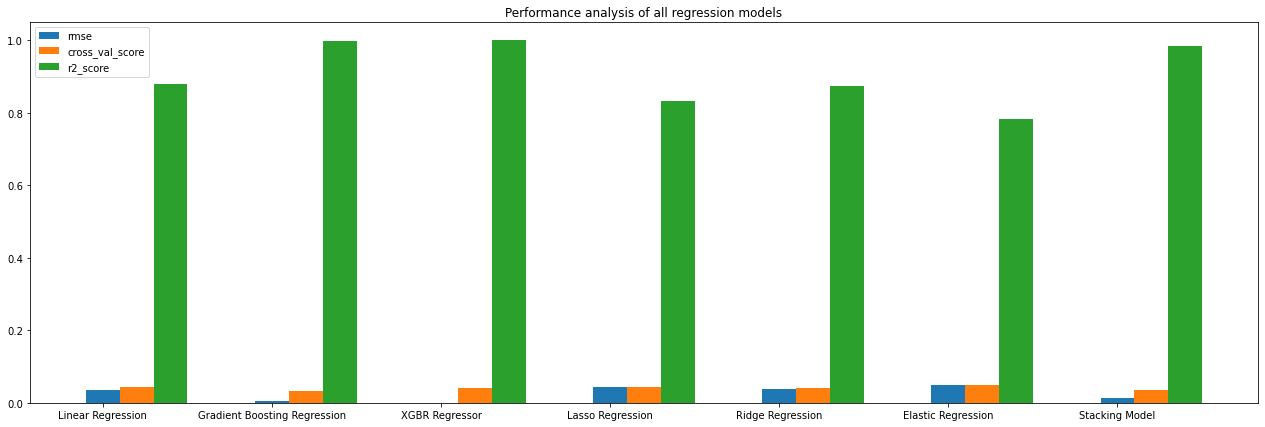

In [41]:
# Comparison of the models 
# Define Data

model_length = models
rmse = models_rmse
cross_val_score = models_cross_val_score
r2_score = models_r2_score

x_axis = np.arange(len(model_length))

plt.figure(figsize=(22, 7))
# Multi bar Chart

plt.bar(x_axis , rmse, width=0.2, label = 'rmse')
plt.bar(x_axis +0.20, cross_val_score, width=0.2, label = 'cross_val_score')
plt.bar(x_axis +0.20*2, r2_score, width=0.2, label = 'r2_score')

# Xticks

plt.xticks(x_axis,model_length)

# Add legend
plt.title("Performance analysis of all regression models")

plt.legend()

# Display

plt.show()

In [43]:
output_df.to_csv('./data/output/submission.csv', index=False) 